# 1.data input


In [2]:
from google.colab import files 
uploaded = files.upload()

Saving agaricus-lepiota.data to agaricus-lepiota.data


In [3]:
from sklearn.model_selection import train_test_split
import pandas as pd  
headerlist = list(range(23))
df = pd.read_csv('agaricus-lepiota.data',names = headerlist) 
print(df) #print all data

     0  1  2  3  4  5  6  7  8  9  10 11 12 13 14 15 16 17 18 19 20 21 22
0     p  x  s  n  t  p  f  c  n  k  e  e  s  s  w  w  p  w  o  p  k  s  u
1     e  x  s  y  t  a  f  c  b  k  e  c  s  s  w  w  p  w  o  p  n  n  g
2     e  b  s  w  t  l  f  c  b  n  e  c  s  s  w  w  p  w  o  p  n  n  m
3     p  x  y  w  t  p  f  c  n  n  e  e  s  s  w  w  p  w  o  p  k  s  u
4     e  x  s  g  f  n  f  w  b  k  t  e  s  s  w  w  p  w  o  e  n  a  g
...  .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. .. ..
8119  e  k  s  n  f  n  a  c  b  y  e  ?  s  s  o  o  p  o  o  p  b  c  l
8120  e  x  s  n  f  n  a  c  b  y  e  ?  s  s  o  o  p  n  o  p  b  v  l
8121  e  f  s  n  f  n  a  c  b  n  e  ?  s  s  o  o  p  o  o  p  b  c  l
8122  p  k  y  n  f  y  f  c  n  b  t  ?  s  k  w  w  p  w  o  e  w  v  l
8123  e  x  s  n  f  n  a  c  b  y  e  ?  s  s  o  o  p  o  o  p  o  c  l

[8124 rows x 23 columns]


# 2.data visualization

In [5]:
total_feature = ['class','cap_shape','cap_surface','cap_color','bruises','odor',
          'gill_attachment','gill_spacing','gill_size','gill_color','stalk_shape',
          'stalk_root','stalk_surface_above_ring','stalk_surface_below_ring',
          'stalk_color_above_ring','stalk_color_below_ring','veil_type','veil_color',
          'ring_number','ring_type','spore_print_color','population','habitat']

feature_detail = [['e','p'],
          ['b','c','x','f','k','s'],
          ['f','g','y','s'],
          ['n','b','c','g','r'],
          ['t','f'],
          ['a','l','c','y','f','m','n','p','s'],
          ['a','d','f','n'],
          ['c','w','d'],
          ['b','n'],
          ['k','n','b','h','g','r','o','p','u','e','w','y'],
          ['e','t'],
          ['b','c','u','e','z','r','?'],
          ['f','y','k','s'],
          ['f','y','k','s'],
          ['n','b','c','g','o','p','e','w','y'],
          ['n','b','c','g','o','p','e','w','y'],
          ['p','u'],
          ['n','o','w','y'],
          ['n','o','t'],
          ['c','e','f','l','n','p','s','z'],
          ['k','n','b','h','r','o','u','w','y'],
          ['a','c','n','s','v','y'],
          ['g','l','m','p','u','w','d']]


In [7]:
def printtable(num,name,feature):
  print(name,feature)
  edible_count = []
  poisonous_count = []
  total_count = []
  for i in feature: #to print feature
    dftmp = df[df[num]==i] 
    f1 = dftmp[dftmp[0]=='e'].shape[0]
    f2 = dftmp[dftmp[0]=='p'].shape[0]
    total = f1+f2
    edible_count.append(f1)
    poisonous_count.append(f2)
    total_count.append(total)
  print('edible_count',edible_count)
  print('poisonous_count',poisonous_count)
  print('total_count',total_count)
  print('\n')
  
for j in range(23):
  printtable(j,total_feature[j],feature_detail[j])  

class ['e', 'p']
edible_count [4208, 0]
poisonous_count [0, 3916]
total_count [4208, 3916]


cap_shape ['b', 'c', 'x', 'f', 'k', 's']
edible_count [404, 0, 1948, 1596, 228, 32]
poisonous_count [48, 4, 1708, 1556, 600, 0]
total_count [452, 4, 3656, 3152, 828, 32]


cap_surface ['f', 'g', 'y', 's']
edible_count [1560, 0, 1504, 1144]
poisonous_count [760, 4, 1740, 1412]
total_count [2320, 4, 3244, 2556]


cap_color ['n', 'b', 'c', 'g', 'r']
edible_count [1264, 48, 32, 1032, 16]
poisonous_count [1020, 120, 12, 808, 0]
total_count [2284, 168, 44, 1840, 16]


bruises ['t', 'f']
edible_count [2752, 1456]
poisonous_count [624, 3292]
total_count [3376, 4748]


odor ['a', 'l', 'c', 'y', 'f', 'm', 'n', 'p', 's']
edible_count [400, 400, 0, 0, 0, 0, 3408, 0, 0]
poisonous_count [0, 0, 192, 576, 2160, 36, 120, 256, 576]
total_count [400, 400, 192, 576, 2160, 36, 3528, 256, 576]


gill_attachment ['a', 'd', 'f', 'n']
edible_count [192, 0, 4016, 0]
poisonous_count [18, 0, 3898, 0]
total_count [210, 0, 

# 3.data processing

In [21]:
from sklearn.preprocessing import LabelEncoder
df = pd.read_csv('agaricus-lepiota.data',names = headerlist)

In [22]:
miss_idx=df[df[11]=='?'].index #drop row with missing in 11th 
df = df.drop(miss_idx)

In [23]:
df = df.astype('category')  #transform data to number
labelencoder=LabelEncoder()
for column in df.columns:
    df[column] = labelencoder.fit_transform(df[column])

In [24]:
from sklearn.utils import shuffle #shuffle the data
df_shuff = shuffle(df)

# 4.model construction

In [25]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import datasets
from sklearn.naive_bayes import CategoricalNB

model_1=CategoricalNB(1.0e-10)
model_2=CategoricalNB(10)


# 5-1.Train-Test-Split(holdout validation)

In [26]:
df_e = df_shuff[df_shuff[0]==0]
df_p = df_shuff[df_shuff[0]==1]

X_e = df_e.drop([0], axis=1)
y_e = df_e[0]
X_e_train, X_e_test, y_e_train, y_e_test = train_test_split(X_e, y_e, test_size=0.3) 

X_p = df_p.drop([0], axis=1)
y_p = df_p[0]
X_p_train, X_p_test, y_p_train, y_p_test = train_test_split(X_p, y_p, test_size=0.3)

X = X_e.append(X_p)
y = y_e.append(y_p)
X_train = X_e_train.append(X_p_train)
y_train = y_e_train.append(y_p_train)
X_test = X_e_test.append(X_p_test)
y_test = y_e_test.append(y_p_test)


# 5-2.Train-Test-Split(K-fold cross validation)

In [27]:
n = int(df_shuff.shape[0]/3)
part1=df_shuff.iloc[0:n]
part2=df_shuff.iloc[n:2*n]
part3=df_shuff.iloc[2*n:df_shuff.shape[0]]
fold1=part1.append(part2)
fold2=part1.append(part3)
fold3=part2.append(part3)

fold1_X_train = fold1.drop([0], axis=1)
fold1_y_train = fold1[0]
fold1_X_test = part3.drop([0], axis=1)
fold1_y_test = part3[0]

fold2_X_train = fold2.drop([0], axis=1)
fold2_y_train = fold2[0]
fold2_X_test = part2.drop([0], axis=1)
fold2_y_test = part2[0]

fold3_X_train = fold3.drop([0], axis=1)
fold3_y_train = fold3[0]
fold3_X_test = part1.drop([0], axis=1)
fold3_y_test = part1[0]


# 6-1.Results(holdout validation)

In [ ]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from tabulate import tabulate
from sklearn.metrics import classification_report

model_1.fit(X_train, y_train)
model_2.fit(X_train, y_train)

y_pred_model_1 = model_1.predict(X_test)
y_pred_model_2 = model_2.predict(X_test)

print("confusion matrix:\n")
print("holdout without laplace")
print(confusion_matrix(y_test, y_pred_model_1))
print("\nholdout with laplace(k=10)")
print(confusion_matrix(y_test, y_pred_model_2))

hold_acc1 = round(accuracy_score(y_test, y_pred_model_1)*100,2)
hold_rec1 = round(sklearn.metrics.recall_score(y_test,y_pred_model_1)*100,2)
hold_pre1 = round(sklearn.metrics.precision_score(y_test,y_pred_model_1)*100,2)
hold_acc2 = round(accuracy_score(y_test, y_pred_model_2)*100,2)
hold_rec2 = round(sklearn.metrics.recall_score(y_test,y_pred_model_2)*100,2)
hold_pre2 = round(sklearn.metrics.precision_score(y_test,y_pred_model_2)*100,2)
data = [["holdout without laplace", "{}%".format(hold_acc1), "{}%".format(hold_rec1), "{}%".format(hold_pre1)],
     ["holdout with laplace(k=10)", "{}%".format(hold_acc2), "{}%".format(hold_rec2), "{}%".format(hold_pre2)] ]
head = ["Model Name", "Accuracy", "Sensitivity(Recall)", "Precision"]
print("\n",tabulate(data, headers=head, tablefmt="grid"))

confusion matrix:

holdout without laplace
[[1256    7]
 [   1 1174]]

holdout with laplace(k=10)
[[1251   12]
 [ 151 1024]]

 +----------------------------+------------+-----------------------+-------------+
| Model Name                 | Accuracy   | Sensitivity(Recall)   | Precision   |
+============================+============+=======================+=============+
| holdout without laplace    | 99.67%     | 99.91%                | 99.41%      |
+----------------------------+------------+-----------------------+-------------+
| holdout with laplace(k=10) | 93.31%     | 87.15%                | 98.84%      |
+----------------------------+------------+-----------------------+-------------+


# 6-2.Results(K-fold validation)

In [ ]:
#without laplace
model_1.fit(fold1_X_train, fold1_y_train)
fold1_y_pred_model_1 = model_1.predict(fold1_X_test)
fold1_c1 = confusion_matrix(fold1_y_test, fold1_y_pred_model_1)
fold1_acc1 = round(accuracy_score(fold1_y_test, fold1_y_pred_model_1)*100,2)
fold1_rec1 = round(sklearn.metrics.recall_score(fold1_y_test,fold1_y_pred_model_1)*100,2)
fold1_pre1 = round(sklearn.metrics.precision_score(fold1_y_test,fold1_y_pred_model_1)*100,2)

model_1.fit(fold2_X_train, fold2_y_train)
fold2_y_pred_model_1 = model_1.predict(fold2_X_test)
fold2_c1 = confusion_matrix(fold2_y_test, fold2_y_pred_model_1)
fold2_acc1 = round(accuracy_score(fold2_y_test, fold2_y_pred_model_1)*100,2)
fold2_rec1 = round(sklearn.metrics.recall_score(fold2_y_test,fold2_y_pred_model_1)*100,2)
fold2_pre1 = round(sklearn.metrics.precision_score(fold2_y_test,fold2_y_pred_model_1)*100,2)

model_1.fit(fold3_X_train, fold3_y_train)
fold3_y_pred_model_1 = model_1.predict(fold3_X_test)
fold3_c1 = confusion_matrix(fold3_y_test, fold3_y_pred_model_1)
fold3_acc1 = round(accuracy_score(fold3_y_test, fold3_y_pred_model_1)*100,2)
fold3_rec1 = round(sklearn.metrics.recall_score(fold3_y_test,fold3_y_pred_model_1)*100,2)
fold3_pre1 = round(sklearn.metrics.precision_score(fold3_y_test,fold3_y_pred_model_1)*100,2)

c1_ave = (fold1_c1+fold2_c1+fold3_c1)/3
print("confusion matrix:\n")
print("K-fold without laplace")
print(c1_ave)
acc1_ave = round((fold1_acc1+fold2_acc1+fold3_acc1)/3,2)
rec1_ave = round((fold1_rec1+fold2_rec1+fold3_rec1)/3,2)
pre1_ave = round((fold1_pre1+fold2_pre1+fold3_pre1)/3,2) 

#with laplace (k=10)
model_2.fit(fold1_X_train, fold1_y_train)
fold1_y_pred_model_2 = model_2.predict(fold1_X_test)
fold1_c2 = confusion_matrix(fold1_y_test, fold1_y_pred_model_2)
fold1_acc2 = round(accuracy_score(fold1_y_test, fold1_y_pred_model_2)*100,2)
fold1_rec2 = round(sklearn.metrics.recall_score(fold1_y_test,fold1_y_pred_model_2)*100,2)
fold1_pre2 = round(sklearn.metrics.precision_score(fold1_y_test,fold1_y_pred_model_2)*100,2)

model_2.fit(fold2_X_train, fold2_y_train)
fold2_y_pred_model_2 = model_2.predict(fold2_X_test)
fold2_c2 = confusion_matrix(fold2_y_test, fold2_y_pred_model_2)
fold2_acc2 = round(accuracy_score(fold2_y_test, fold2_y_pred_model_2)*100,2)
fold2_rec2 = round(sklearn.metrics.recall_score(fold2_y_test,fold2_y_pred_model_2)*100,2)
fold2_pre2 = round(sklearn.metrics.precision_score(fold2_y_test,fold2_y_pred_model_2)*100,2)

model_2.fit(fold3_X_train, fold3_y_train)
fold3_y_pred_model_2 = model_2.predict(fold3_X_test)
fold3_c2 = confusion_matrix(fold3_y_test, fold3_y_pred_model_2)
fold3_acc2 = round(accuracy_score(fold3_y_test, fold3_y_pred_model_2)*100,2)
fold3_rec2 = round(sklearn.metrics.recall_score(fold3_y_test,fold3_y_pred_model_2)*100,2)
fold3_pre2 = round(sklearn.metrics.precision_score(fold3_y_test,fold3_y_pred_model_2)*100,2)

c2_ave = (fold1_c2+fold2_c2+fold3_c2)/3
print("\nK-fold with laplace(k=10)")
print(c2_ave)
acc2_ave = round((fold1_acc2+fold2_acc2+fold3_acc2)/3,2)
rec2_ave = round((fold1_rec2+fold2_rec2+fold3_rec2)/3,2)
pre2_ave = round((fold1_pre2+fold2_pre2+fold3_pre2)/3,2) 

data = [["K-fold without laplace", "{}%".format(acc1_ave), "{}%".format(rec1_ave), "{}%".format(pre1_ave)],
     ["K-fold with laplace(k=10)", "{}%".format(acc2_ave), "{}%".format(rec2_ave), "{}%".format(pre2_ave)] ]
head = ["Model Name", "Accuracy", "Sensitivity(Recall)", "Precision"]
print("\n",tabulate(data, headers=head, tablefmt="grid"))

confusion matrix:

K-fold without laplace
[[1.39600000e+03 6.66666667e+00]
 [1.00000000e+00 1.30433333e+03]]

K-fold with laplace(k=10)
[[1388.33333333   14.33333333]
 [ 168.33333333 1137.        ]]

 +---------------------------+------------+-----------------------+-------------+
| Model Name                | Accuracy   | Sensitivity(Recall)   | Precision   |
+===========================+============+=======================+=============+
| K-fold without laplace    | 99.72%     | 99.92%                | 99.49%      |
+---------------------------+------------+-----------------------+-------------+
| K-fold with laplace(k=10) | 93.25%     | 87.12%                | 98.75%      |
+---------------------------+------------+-----------------------+-------------+


# 8.Questions 

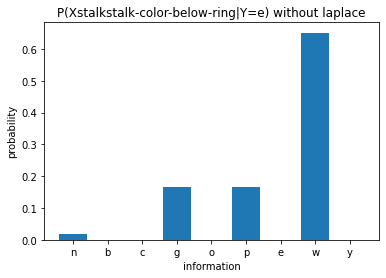

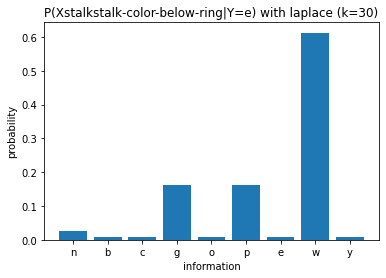

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

headerlist = list(range(23))
df = pd.read_csv('agaricus-lepiota.data',names = headerlist)
feature_detail = ['n','b','c','g','o','p','e','w','y']
miss_idx=df[df[11]=='?'].index #drop row with missing in 11th 
df = df.drop(miss_idx)

def print_bar(alpha,name):
  edible_count = []
  poisonous_count = []
  total_count = []
  total_num = df[df[0]=='e'].shape[0] + alpha * len(feature_detail)
  P = []
  for i in feature_detail: #to print feature
    dftmp = df[df[15]==i] 
    f1 = dftmp[dftmp[0]=='e'].shape[0] + alpha
    edible_count.append(f1)
  
  for i in range(len(feature_detail)):
    tmp = edible_count[i]/total_num
    P.append(tmp)

  x = np.arange(len(feature_detail))
  plt.bar(x, P)
  plt.xticks(x, feature_detail)
  plt.xlabel('information')
  plt.ylabel('probability')
  plt.title(name)
  plt.show() 

print_bar(0,"P(Xstalkstalk-color-below-ring|Y=e) without laplace") 
print_bar(30,"P(Xstalkstalk-color-below-ring|Y=e) with laplace (k=30)")